In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load LDA model
with open('models/lda_model_150.pkl', 'rb') as f:
    lda_model = pickle.load(f)

In [3]:
# load dataframe containing topics
df = pd.read_pickle('C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/data_topics.pkl')

In [4]:
# add year column
df['year'] = df['date'].dt.year

In [17]:
df.head()

,text,date,legislative_period,speaker_name,speaker_gender,speaker_role,speaker_party,comments,id,speaker_id,speech_length,topic_distribution,year
0,Sehr geehrter Herr Alterspräsident! So muss ...,2021-10-26,20,Gabriele Katzmarek,female,None,SPD,[(Beifall bei der SPD sowie bei Abgeordneten d...,SP-2021-0,1299,2593,{68: 0.35882655},2021
1,Herr Präsident! Liebe Kolleginnen und Kolleg...,2021-10-26,20,Stefan Müller,male,None,CDU/CSU,[(Beifall bei der CDU/CSU sowie bei Abgeordnet...,SP-2021-1,4028,3796,{68: 0.46776655},2021
2,Sehr geehrter Herr Alterspräsident Wolfgang ...,2021-10-26,20,Britta Haßelmann,female,None,BÜNDNIS 90/DIE GRÜNEN,[(Beifall beim BÜNDNIS 90/DIE GRÜNEN und bei d...,SP-2021-2,451,4301,{68: 0.26328164},2021
3,Sehr geehrter Herr Präsident! Meine lieben K...,2021-10-26,20,Marco Buschmann,male,None,FDP,"[(Jan Korte [DIE LINKE]: Oder Jugendweihe!), (...",SP-2021-3,3083,4555,{},2021
4,Herr Alterspräsident! Lassen Sie mich zunäch...,2021-10-26,20,Stephan Brandner,male,None,AfD,"[(Beifall bei der AfD), (Beifall bei Abgeordne...",SP-2021-4,4055,5996,{68: 0.3120498},2021


In [8]:
topics_of_interest = {
    14: 'Jugend und Förderung',
    115: 'Gleichberechtigung',
    37: 'Militär',
    126: 'Rente und Sozialpolitik',
    129: 'Russland-Ukraine-Konflikt',
    118: 'Entwicklungspolitik ',
    135: 'Energie und Klima',
    148: 'Kinder und Familienpolitik',
    2: 'Strafe und Verbrechen',
    25: 'Gesundheitswesen ',
    26: 'Umweltschutz ',
    46: 'Bildungspolitik ',
    5: 'Familienrecht ',
    32: 'Kultur',
    131: 'Schwangerschaftsabbruch ',
    106: 'Corona',
    0: 'Gesundheitsrisiken'
}

# Historical Development of Speeches in Topic

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
    speeches_per_year = filtered_df.groupby('year').size()

    plt.figure(figsize=(15, 8))
    plt.bar(speeches_per_year.index, speeches_per_year.values, color='darkseagreen')
    plt.title(f'Chronological Topic Distribution for "{topic_title}"')
    plt.xlabel('Year')
    plt.ylabel('Number of Speeches')
    plt.xticks(rotation=45)
     
    plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_yearly/{topic_title}.png') #pad_inches=0

# Topic by Speaker Gender

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
    speeches_per_gender = filtered_df.groupby('speaker_gender').size()
    sum_speeches = speeches_per_gender.sum()

    plt.figure(figsize=(10, 6))
    bar = plt.bar(speeches_per_gender.index, speeches_per_gender.values/sum_speeches*100, color=['orange', 'lightblue'], alpha=0.6)
    plt.title(f'Gender Topic Distribution for "{topic_title}"')
    plt.xlabel('Speaker Gender')
    plt.ylabel('Distribution of Speeches in %')
    plt.xticks(rotation=45)
    plt.ylim(top=100)
    plt.bar_label(bar, label_type='edge', fmt='{:0.0f}%')

    plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_gender/{topic_title}.png') #pad_inches=0

# Historical Development of Speeches by Gender

In [11]:
# function for setting custom bar labels
def set_bar_labels(plot):
    # check current plot
    fem_plot = plot.get_label() == 'female speakers'

    for bar in plot:
        height = bar.get_height()
        y_pos = height - 1.5 if fem_plot else 100.5 - height
        text_padding = 0.1 if round(height) == 100 else 0.2

        if round(height) != 0:
            plt.text(bar.get_x() + text_padding, 
                    y_pos, 
                    s=f'{round(height)}',
                    fontsize='xx-small' if round(height) == 100 else 'x-small',
                    color='chocolate' if fem_plot else 'steelblue'
                    )

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
    speeches_per_year = filtered_df.groupby('year').size()
    grouped_df = filtered_df.groupby(['year', 'speaker_gender']).size().unstack(level=0)

    years = []
    female_speech_count = []
    male_speech_count = []

    for year, gender in grouped_df.items():
        years.append(year)
        female_speech_count.append(gender.iloc[0] if gender.iloc[0] > 0 else 0)
        male_speech_count.append(gender.iloc[1] if gender.iloc[1] > 0 else 0)

    relative_female_speeches = female_speech_count / speeches_per_year * 100
    relative_male_speeches = male_speech_count / speeches_per_year * 100

    plt.figure(figsize=(20, 10))
    bar_fem = plt.bar(years,
                      relative_female_speeches, 
                      color='orange', 
                      width=1, 
                      edgecolor='grey', 
                      label='female speakers',
                      alpha=0.6
                      )
    bar_male = plt.bar(years,
                       relative_male_speeches,
                       bottom=relative_female_speeches, 
                       color='lightblue', 
                       width=1, 
                       edgecolor='grey', 
                       label='male speakers',
                       alpha=0.6
                       )
    
    plt.title(f'Chronological Development of Topic Distribution for "{topic_title}"')
    plt.xlabel('Year')
    plt.ylabel('Distribution of Speeches in %')
    plt.xticks(rotation=45)
    plt.margins(x=0, y=0)
    plt.legend(loc='upper right')

    # set custom bar labels
    for plot in [bar_fem, bar_male]:
        set_bar_labels(plot)
        
    plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_gender_yearly/{topic_title}.png') #pad_inches=0

In [13]:
# test if relative values add up to 100
print(relative_female_speeches.values + relative_male_speeches.values)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100.]


## Test if missing years are correct

In [18]:
filtered_df = df[df['topic_distribution'].apply(lambda topics: 129 in topics)] # Topic Russland-Ukraine-Konflikt
grouped_df = filtered_df.groupby(['year', 'speaker_gender']).size().unstack(level=0)

speeches_per_year = filtered_df.groupby('year').size()

In [25]:
filtered_df[filtered_df['year'] == 1956]

,text,date,legislative_period,speaker_name,speaker_gender,speaker_role,speaker_party,comments,id,speaker_id,speech_length,topic_distribution,year


In [26]:
for year, gender in grouped_df.items():
    print(year, gender)

1950 speaker_gender
female    NaN
male      2.0
Name: 1950, dtype: float64
1952 speaker_gender
female    NaN
male      5.0
Name: 1952, dtype: float64
1953 speaker_gender
female    NaN
male      3.0
Name: 1953, dtype: float64
1954 speaker_gender
female    NaN
male      2.0
Name: 1954, dtype: float64
1955 speaker_gender
female    NaN
male      1.0
Name: 1955, dtype: float64
1958 speaker_gender
female    1.0
male      2.0
Name: 1958, dtype: float64
1959 speaker_gender
female    NaN
male      1.0
Name: 1959, dtype: float64
1960 speaker_gender
female    NaN
male      2.0
Name: 1960, dtype: float64
1961 speaker_gender
female    NaN
male      3.0
Name: 1961, dtype: float64
1962 speaker_gender
female    NaN
male      5.0
Name: 1962, dtype: float64
1963 speaker_gender
female    NaN
male      2.0
Name: 1963, dtype: float64
1964 speaker_gender
female    1.0
male      9.0
Name: 1964, dtype: float64
1965 speaker_gender
female    NaN
male      5.0
Name: 1965, dtype: float64
1966 speaker_gender
femal

## Reference Graphic - Speeches per Year

In [27]:
total_speeches_per_year = df.groupby('year').size()

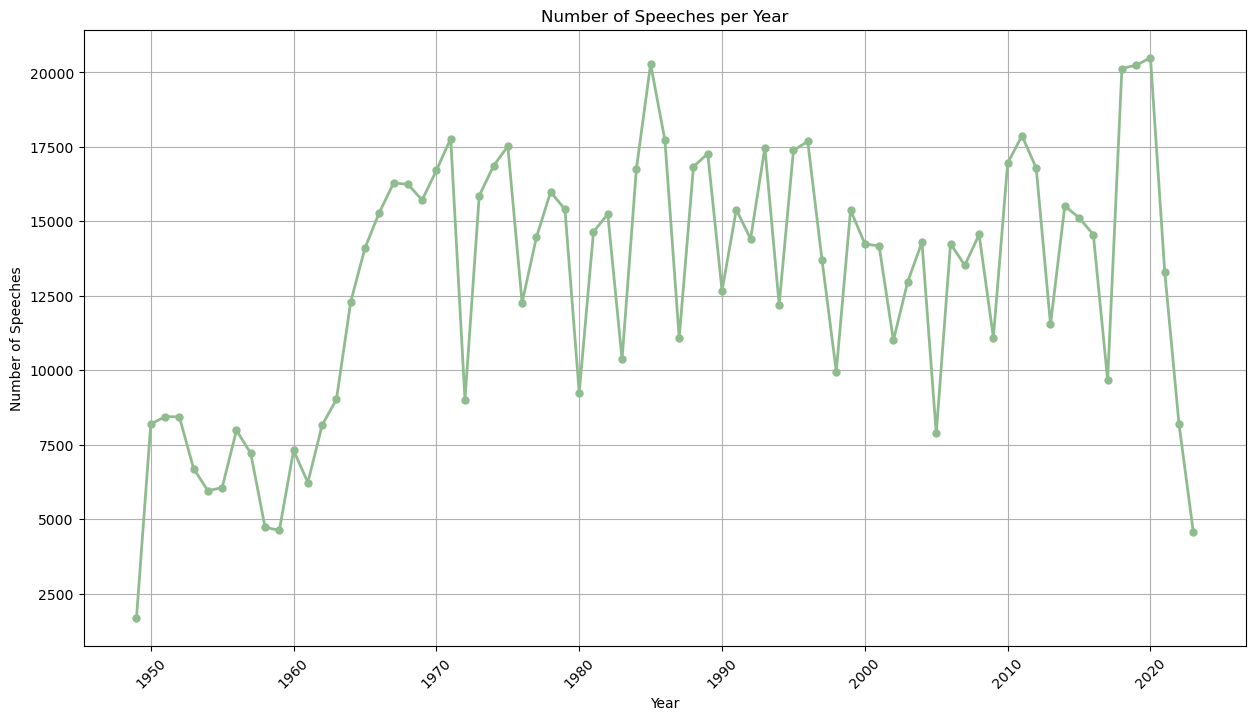

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(total_speeches_per_year.index, 
         total_speeches_per_year.values, 
         marker='.',
         markersize=10.0,
         linestyle='-',
         linewidth=2.0,
         color='darkseagreen')
plt.title('Number of Speeches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Topic Frequency by Average Female/Male Speaker

In [69]:
grouped_df = df.groupby(['year', 'speaker_gender'])
yearly_female_speeches = []
yearly_male_speeches = []

for year, gender in grouped_df.size().unstack(level=0).items():
    male_speech_count = len(grouped_df.get_group((year, 'male')))
    female_speech_count = len(grouped_df.get_group((year, 'female')))

    yearly_male_speeches.append(male_speech_count)
    yearly_female_speeches.append(female_speech_count)

In [84]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
    grouped_topic_df = filtered_df.groupby(['year', 'speaker_gender']).size().unstack(level=0)

    years = []
    female_speech_count = []
    male_speech_count = []

    for year, gender in grouped_topic_df.items():
        years.append(year)
        female_speech_count.append(gender.iloc[0] if gender.iloc[0] > 0 else 0)
        male_speech_count.append(gender.iloc[1] if gender.iloc[1] > 0 else 0)

    fem_speech_frequency = [int(count) / int(total_count) * 100 for count, total_count in zip(female_speech_count, yearly_female_speeches)]
    male_speech_frequency = [int(count) / int(total_count) * 100 for count, total_count in zip(male_speech_count, yearly_male_speeches)]

    print(fem_speech_frequency)

    # plt.figure(figsize=(20, 10))
    # bar_fem = plt.bar(years,
    #                   relative_female_speeches, 
    #                   color='orange', 
    #                   width=1, 
    #                   edgecolor='grey', 
    #                   label='female speakers',
    #                   alpha=0.6
    #                   )
    # bar_male = plt.bar(years,
    #                    relative_male_speeches,
    #                    bottom=relative_female_speeches, 
    #                    color='lightblue', 
    #                    width=1, 
    #                    edgecolor='grey', 
    #                    label='male speakers',
    #                    alpha=0.6
    #                    )
    
    # plt.title(f'Chronological Development of Topic Distribution for "{topic_title}"')
    # plt.xlabel('Year')
    # plt.ylabel('Distribution of Speeches in %')
    # plt.xticks(rotation=45)
    # plt.margins(x=0, y=0)
    # plt.legend(loc='upper right')
        
    # plt.show()
    #plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_gender_yearly/{topic_title}.png') #pad_inches=0

[0.0, 0.0, 0.591715976331361, 0.38314176245210724, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5780346820809248, 0.6622516556291391, 0.5882352941176471, 0.0, 0.3861003861003861, 0.26595744680851063, 0.8086253369272237, 1.7369727047146404, 0.5548705302096177, 0.129366106080207, 0.6134969325153374, 0.4491017964071856, 0.05827505827505827, 0.1088139281828074, 0.7049345417925479, 0.1422981145499822, 0.0, 0.21961932650073207, 0.4663557628247834, 0.1261564339781329, 0.1340931947703654, 0.4344391785150079, 0.6611570247933884, 0.5876068376068376, 0.44198895027624313, 1.245674740484429, 0.9803921568627451, 0.18712574850299402, 0.734441437959026, 1.2091898428053205, 0.4679144385026738, 0.9312638580931265, 0.7407407407407408, 0.8019911504424779, 0.6243213897937026, 0.39020160416215044, 1.0358094110683633, 0.5054589567327133, 0.30616150019135097, 1.0833333333333335, 0.9718670076726342, 0.8981058131939909, 0.9902772776377385, 0.819088319088319, 1.126573889993373, 0.8505997818974919, 1.5324238460100916, 4.1395045632

In [10]:
grouped_df = df.groupby(['year', 'speaker_gender']).size().unstack(level=0)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
speaker_gender,,,,,,,,,,,,,,,,,,,,,
female,41,162,169,261,173,207,166,299,364,173,...,7264,7212,7185,4809,6048,6744,6829,5288,2819,1590
male,1654,8035,8276,8179,6526,5750,5899,7685,6849,4564,...,8251,7913,7369,4859,14083,13498,13664,8007,5367,2983


### Hubis Beispielcode

In [ ]:
#TODO check percentages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
# Sample data
speech_data = {
    1950: {'male': 120, 'female': 3},
    1951: {'male': 115, 'female': 5},
    1952: {'male': 113, 'female': 7},
    # ... 
    2022: {'male': 90, 'female': 70}
}
 
# Sample data for parliament members
members_data = {
    1950: {'male': 80, 'female': 3},
    1951: {'male': 78, 'female': 4},
    1952: {'male': 78, 'female': 8},
    # ... 
    2022: {'male': 50, 'female': 40}
}
 
years = list(speech_data.keys())
 
# Preparing speech data
male_speeches = [speech_data[year]['male'] for year in years]
female_speeches = [speech_data[year]['female'] for year in years]
 
# Preparing members data
male_members = [members_data[year]['male'] for year in years]
female_members = [members_data[year]['female'] for year in years]
 
# Scale the data by the male/female fractions
total_speeches = np.array(male_speeches) + np.array(female_speeches)
male_percent = np.array(male_speeches) / male_members
female_percent = np.array(female_speeches) / female_members
 
# Plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(years, male_percent, "o--", label='Male')
ax.plot(years, female_percent, "o--", label='Female')
 
ax.set_xlabel('Year')
ax.set_ylabel('Speeches per member')
ax.set_title('Speeches per member by Gender (1950-2022)')
plt.legend()
plt.show()